100+ documentos


In [6]:
import random
import os

# Función para generar un documento de texto con palabras simples
def generar_documento(nombre_archivo, num_palabras=50):
    palabras_simples = ["hola", "mundo", "python", "programar", "codigo", "algoritmo", "texto", "documento", "aprendizaje", "inteligente", "Machine Learning", "redes", "neuronales", "datos", "análisis", "ciencia", "informática", "tecnología", "computadora", "software", "hardware", "programación", "desarrollo", "sistema", "aplicación", "función", "variable", "bucle", "condicional", "lista", "diccionario", "conjunto", "tupla"]
    texto = " ".join(random.choices(palabras_simples, k=num_palabras))

    with open(nombre_archivo, 'w') as archivo:
        archivo.write(texto)

num_documentos = 100  # Número de documentos a generar

# Ruta de la carpeta donde se guardarán los documentos
directorio_documentos = './100_documentos'

# Crear la carpeta si no existe
if not os.path.exists(directorio_documentos):
    os.makedirs(directorio_documentos)
    print(f"Carpeta creada: {directorio_documentos}")

# Generar los documentos solicitados
for i in range(num_documentos):
    generar_documento(f'{directorio_documentos}/documento_{i+1}.txt')

# Verificar que los documentos han sido creados
print("Archivos generados:", os.listdir(directorio_documentos))

Archivos generados: ['documento_1.txt', 'documento_10.txt', 'documento_100.txt', 'documento_11.txt', 'documento_12.txt', 'documento_13.txt', 'documento_14.txt', 'documento_15.txt', 'documento_16.txt', 'documento_17.txt', 'documento_18.txt', 'documento_19.txt', 'documento_2.txt', 'documento_20.txt', 'documento_21.txt', 'documento_22.txt', 'documento_23.txt', 'documento_24.txt', 'documento_25.txt', 'documento_26.txt', 'documento_27.txt', 'documento_28.txt', 'documento_29.txt', 'documento_3.txt', 'documento_30.txt', 'documento_31.txt', 'documento_32.txt', 'documento_33.txt', 'documento_34.txt', 'documento_35.txt', 'documento_36.txt', 'documento_37.txt', 'documento_38.txt', 'documento_39.txt', 'documento_4.txt', 'documento_40.txt', 'documento_41.txt', 'documento_42.txt', 'documento_43.txt', 'documento_44.txt', 'documento_45.txt', 'documento_46.txt', 'documento_47.txt', 'documento_48.txt', 'documento_49.txt', 'documento_5.txt', 'documento_50.txt', 'documento_51.txt', 'documento_52.txt', 'do

In [7]:
# Importamos las librerías necesarias
import os  
import re  
import json
from collections import Counter  
from nltk.util import ngrams  # Para generar n-gramas (pares o grupos de palabras consecutivas)

# Ruta donde se encuentran los documentos generados
directorio_documentos = './100_documentos'

# Verificar si la carpeta existe
if not os.path.exists(directorio_documentos):
    print(f"La carpeta '{directorio_documentos}' no existe. Por favor, crea la carpeta y agrega los documentos.")
else:
    # Función para limpiar y tokenizar texto
    def limpiar_y_tokenizar(texto):
        """
        Esta función toma un texto como entrada y realiza los siguientes pasos:
        1. Convierte todo el texto a minúsculas para evitar diferencias entre palabras como "Hola" y "hola".
        2. Elimina signos de puntuación utilizando regex.
        3. Divide el texto en palabras individuales (tokens) separadas por espacios.
        """
        texto = texto.lower()
        # Eliminar signos de puntuación (todo lo que no sea letras, números o espacios)
        texto = re.sub(r'[^\w\s]', '', texto)
        # Dividir el texto en palabras (tokens)
        tokens = texto.split()
        return tokens  # Devolvemos la lista de palabras

    # Función para generar n-gramas
    def generar_ngrams(tokens, n=2):
        """
        Esta función genera n-gramas a partir de una lista de palabras (tokens).
        Un n-grama es una secuencia de 'n' palabras consecutivas.
        Por ejemplo:
        - Para n=2 (bi-gramas): ['hola', 'mundo'] -> [('hola', 'mundo')]
        """
        return list(ngrams(tokens, n))  # Usamos la función ngrams de nltk para generar los n-gramas

    # Procesar todos los documentos de texto
    for archivo in os.listdir(directorio_documentos):  
        # Construimos la ruta completa del archivo
        ruta_archivo = os.path.join(directorio_documentos, archivo) #agregamos el nombre del archivo a la ruta
        
        with open(ruta_archivo, 'r', encoding='latin-1') as f:
            texto = f.read()
            
            # Limpieza y tokenización del texto
            tokens = limpiar_y_tokenizar(texto)
            
            # Generar bi-gramas (pares de palabras consecutivas)
            bigramas = generar_ngrams(tokens, 2)
            print(f"Bi-gramas generados para el archivo {archivo}: {bigramas}")

Bi-gramas generados para el archivo documento_1.txt: [('codigo', 'codigo'), ('codigo', 'tupla'), ('tupla', 'codigo'), ('codigo', 'aprendizaje'), ('aprendizaje', 'codigo'), ('codigo', 'desarrollo'), ('desarrollo', 'hola'), ('hola', 'inteligente'), ('inteligente', 'texto'), ('texto', 'diccionario'), ('diccionario', 'tupla'), ('tupla', 'hardware'), ('hardware', 'condicional'), ('condicional', 'conjunto'), ('conjunto', 'hardware'), ('hardware', 'hardware'), ('hardware', 'algoritmo'), ('algoritmo', 'condicional'), ('condicional', 'ciencia'), ('ciencia', 'desarrollo'), ('desarrollo', 'hola'), ('hola', 'función'), ('función', 'variable'), ('variable', 'variable'), ('variable', 'variable'), ('variable', 'neuronales'), ('neuronales', 'hola'), ('hola', 'tecnología'), ('tecnología', 'datos'), ('datos', 'análisis'), ('análisis', 'diccionario'), ('diccionario', 'machine'), ('machine', 'learning'), ('learning', 'tupla'), ('tupla', 'bucle'), ('bucle', 'ciencia'), ('ciencia', 'variable'), ('variable',

In [8]:
# Crear una tabla hash para almacenar los n-gramas
tabla_hash = {}

# Función para agregar n-gramas a la tabla hash
def agregar_a_tabla_hash(ngrams, tabla_hash):
    for ngram in ngrams:
        if ngram in tabla_hash:
            tabla_hash[ngram] += 1
        else:
            tabla_hash[ngram] = 1

# Procesar todos los documentos y almacenar los n-gramas en la tabla hash
for archivo in os.listdir(directorio_documentos):
    ruta_archivo = os.path.join(directorio_documentos, archivo)
    with open(ruta_archivo, 'r', encoding='latin-1') as f:
        texto = f.read()
        # Limpieza y tokenización
        tokens = limpiar_y_tokenizar(texto)
        # Generar bi-gramas y tri-gramas
        bigramas = generar_ngrams(tokens, 2)
        # Agregar n-gramas a la tabla hash
        agregar_a_tabla_hash(bigramas, tabla_hash)

# Mostrar los n-gramas almacenados en la tabla hash
print("Tabla Hash de n-gramas:")
for ngram, frecuencia in tabla_hash.items():
    print(f"{ngram}: {frecuencia}")

Tabla Hash de n-gramas:
('codigo', 'codigo'): 3
('codigo', 'tupla'): 6
('tupla', 'codigo'): 4
('codigo', 'aprendizaje'): 5
('aprendizaje', 'codigo'): 7
('codigo', 'desarrollo'): 6
('desarrollo', 'hola'): 7
('hola', 'inteligente'): 7
('inteligente', 'texto'): 3
('texto', 'diccionario'): 6
('diccionario', 'tupla'): 3
('tupla', 'hardware'): 4
('hardware', 'condicional'): 5
('condicional', 'conjunto'): 7
('conjunto', 'hardware'): 6
('hardware', 'hardware'): 5
('hardware', 'algoritmo'): 3
('algoritmo', 'condicional'): 3
('condicional', 'ciencia'): 4
('ciencia', 'desarrollo'): 6
('hola', 'función'): 8
('función', 'variable'): 5
('variable', 'variable'): 3
('variable', 'neuronales'): 5
('neuronales', 'hola'): 5
('hola', 'tecnología'): 7
('tecnología', 'datos'): 2
('datos', 'análisis'): 7
('análisis', 'diccionario'): 6
('diccionario', 'machine'): 7
('machine', 'learning'): 145
('learning', 'tupla'): 2
('tupla', 'bucle'): 2
('bucle', 'ciencia'): 5
('ciencia', 'variable'): 8
('variable', 'hardwa

In [9]:
# Función para calcular la Similitud de Jaccard
def calcular_similitud_jaccard(ngrams_doc1, ngrams_doc2):
    # Convertir los n-gramas a conjuntos
    conjunto1 = set(ngrams_doc1)#set para eliminar duplicados
    conjunto2 = set(ngrams_doc2)
    # Calcular la intersección y la unión
    interseccion = len(conjunto1.intersection(conjunto2)) #intersección de los conjuntos
    union = len(conjunto1.union(conjunto2))
    # Retornar la similitud de Jaccard
    return interseccion / union if union != 0 else 0

# Comparar documentos en el directorio y almacenar similitudes
documentos = os.listdir(directorio_documentos)
similitudes = []

for i in range(len(documentos)):
    for j in range(i + 1, len(documentos)):
        # Leer y procesar el primer documento
        ruta_doc1 = os.path.join(directorio_documentos, documentos[i]) #agregamos el nombre del archivo a la ruta
        with open(ruta_doc1, 'r', encoding='latin-1') as f1: #agregamos el nombre del archivo a la ruta
            texto1 = f1.read()
            tokens1 = limpiar_y_tokenizar(texto1)
            ngrams_doc1 = generar_ngrams(tokens1, 2)  # Cambiar a 3 para tri-gramas

        # Leer y procesar el segundo documento
        ruta_doc2 = os.path.join(directorio_documentos, documentos[j])
        with open(ruta_doc2, 'r', encoding='latin-1') as f2:
            texto2 = f2.read()
            tokens2 = limpiar_y_tokenizar(texto2)
            ngrams_doc2 = generar_ngrams(tokens2, 2)  # Cambiar a 3 para tri-gramas

        # Calcular la similitud de Jaccard
        similitud = calcular_similitud_jaccard(ngrams_doc1, ngrams_doc2) 
        similitudes.append((documentos[i], documentos[j], similitud))

# Ordenar las similitudes de mayor a menor
similitudes.sort(key=lambda x: x[2], reverse=True) 


In [10]:
# Algoritmo Merge Sort para ordenar las similitudes
def merge_sort(similitudes):
    if len(similitudes) <= 1:
        return similitudes

    # Dividir la lista en dos mitades
    mid = len(similitudes) // 2
    izquierda = merge_sort(similitudes[:mid])
    derecha = merge_sort(similitudes[mid:])

    # Combinar las mitades ordenadas
    return merge(izquierda, derecha)

def merge(izquierda, derecha):
    resultado = []
    i = j = 0

    # Comparar y combinar las dos listas
    while i < len(izquierda) and j < len(derecha):
        if izquierda[i][2] > derecha[j][2]:  # Ordenar por similitud (índice 2)
            resultado.append(izquierda[i])
            i += 1
        else:
            resultado.append(derecha[j])
            j += 1

    # Agregar los elementos restantes
    resultado.extend(izquierda[i:])
    resultado.extend(derecha[j:])
    return resultado

# Ordenar las similitudes usando Merge Sort
similitudes_ordenadas = merge_sort(similitudes)

# Mostrar los N documentos más similares
N = 10  
print(f"Top {N} documentos más similares:")
for doc1, doc2, similitud in similitudes_ordenadas[:N]:
    print(f"{doc1} y {doc2}: {similitud:.2f}")

# Guardar las similitudes ordenadas en un archivo JSON
ruta_resultados = './similitudes_ordenadas.json'
with open(ruta_resultados, 'w', encoding='utf-8') as f:
    json.dump(similitudes_ordenadas, f, ensure_ascii=False, indent=4)


Top 10 documentos más similares:
documento_42.txt y documento_54.txt: 0.11
documento_21.txt y documento_6.txt: 0.10
documento_57.txt y documento_90.txt: 0.09
documento_50.txt y documento_99.txt: 0.09
documento_37.txt y documento_88.txt: 0.09
documento_15.txt y documento_67.txt: 0.09
documento_60.txt y documento_62.txt: 0.09
documento_21.txt y documento_52.txt: 0.09
documento_16.txt y documento_79.txt: 0.09
documento_15.txt y documento_53.txt: 0.09


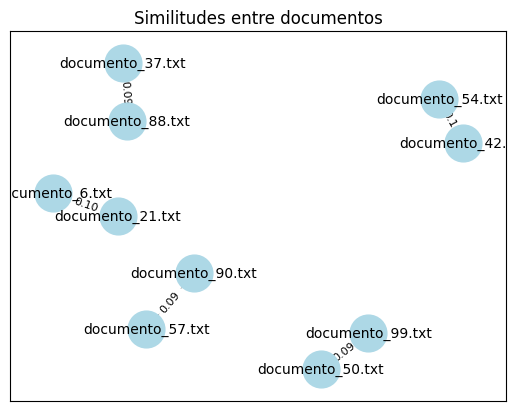

In [11]:
# Importar las bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
import json


# Cargar las similitudes ordenadas desde el archivo JSON
ruta_resultados = './similitudes_ordenadas.json'
with open(ruta_resultados, 'r', encoding='latin-1') as f:
    similitudes_ordenadas = json.load(f)


# Crear un grafo para representar las similitudes
def graficar_similitudes(similitudes, N):
    """
    Esta función crea un grafo para visualizar las similitudes entre documentos.
    - similitudes: lista de tuplas (doc1, doc2, similitud)
    - N: número de conexiones más importantes a mostrar
    """
    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos y aristas al grafo
    for doc1, doc2, similitud in similitudes[:N]:
        G.add_edge(doc1, doc2, weight=similitud)

    # Obtener las posiciones de los nodos para la visualización
    pos = nx.spring_layout(G)  # Layout para distribuir los nodos

    # Dibujar los nodos
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Dibujar las aristas con pesos (similitudes)
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 2 for (_, _, d) in edges])

    # Dibujar las etiquetas de los nodos
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    # Dibujar las etiquetas de las aristas (similitudes)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Mostrar el grafo
    plt.title("Similitudes entre documentos")
    plt.show()

# Llamar a la función para graficar las similitudes
N = 5  # Número de conexiones más importantes a mostrar
graficar_similitudes(similitudes_ordenadas, N)